In [35]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
import pgeocode




In [36]:
# Import the data from the CSV file
mls_df = pd.read_csv("Clean_Data/mls_th_cleaned.csv")
mls_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
0,2509707,Cary,27511,4,4,6115,1,1985,2023-05-08,2023-06-12,1049900,1275000,35,225100,35.7641,-78.7786,4,208.503679
1,2444544,Chapel Hill,27517,4,5,4049,1,2004,2022-04-25,2022-06-07,1090000,1300000,43,210000,35.9182,-79.0035,1,321.066930
2,2320632,Durham,27707,3,5,2763,1,2020,2020-05-22,2021-08-05,575000,729840,440,154840,35.9631,-78.9315,1,264.147666
3,2428221,Cary,27511,3,4,3477,1,2004,2022-01-24,2022-02-09,949900,1100000,16,150100,35.7641,-78.7786,4,316.364682
4,10018970,Chapel Hill,27517,4,5,4049,1,2004,2024-04-06,2024-04-17,1350000,1500000,11,150000,35.9182,-79.0035,1,370.461842


In [37]:
# Copy the data frame to a new data frame
th_df = mls_df.copy()

th_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
0,2509707,Cary,27511,4,4,6115,1,1985,2023-05-08,2023-06-12,1049900,1275000,35,225100,35.7641,-78.7786,4,208.503679
1,2444544,Chapel Hill,27517,4,5,4049,1,2004,2022-04-25,2022-06-07,1090000,1300000,43,210000,35.9182,-79.0035,1,321.066930
2,2320632,Durham,27707,3,5,2763,1,2020,2020-05-22,2021-08-05,575000,729840,440,154840,35.9631,-78.9315,1,264.147666
3,2428221,Cary,27511,3,4,3477,1,2004,2022-01-24,2022-02-09,949900,1100000,16,150100,35.7641,-78.7786,4,316.364682
4,10018970,Chapel Hill,27517,4,5,4049,1,2004,2024-04-06,2024-04-17,1350000,1500000,11,150000,35.9182,-79.0035,1,370.461842


In [38]:
th_df.describe()

,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
count,21345.000000,21345.000000,21345.000000,21345.000000,21345.000000,21345.000000,2.134500e+04,2.134500e+04,21345.000000,21345.000000,21345.000000,21345.000000,21345.000000,21345.000000
mean,27581.304521,2.923495,3.104989,1797.982197,1.018787,2011.177044,3.549273e+05,3.594037e+05,94.609229,4476.483860,35.836716,-78.765621,2.293183,304.942274
std,130.478159,0.614513,0.637771,470.790743,0.214000,124.799172,1.216260e+05,1.209846e+05,142.554717,17808.068497,0.148004,0.240251,1.488953,4821.989826
min,23917.000000,0.000000,1.000000,1.000000,1.000000,202.000000,2.200000e+03,2.200000e+03,0.000000,-170000.000000,33.904700,-83.092900,0.000000,1.304864
25%,27519.000000,3.000000,3.000000,1460.000000,1.000000,2004.000000,2.771650e+05,2.819650e+05,37.000000,-1900.000000,35.764500,-78.887000,1.000000,173.319328
50%,27603.000000,3.000000,3.000000,1735.000000,1.000000,2016.000000,3.390000e+05,3.420800e+05,56.000000,0.000000,35.848000,-78.790800,3.000000,197.613302
75%,27616.000000,3.000000,3.000000,2079.000000,1.000000,2021.000000,4.100000e+05,4.150000e+05,125.000000,10000.000000,35.918200,-78.600800,4.000000,223.495702
max,28751.000000,6.000000,23.000000,7550.000000,8.000000,20014.000000,1.973000e+06,1.905000e+06,16094.000000,225100.000000,39.363100,-76.660400,4.000000,265000.000000


In [39]:
th_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21345 entries, 0 to 21344
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MLS #           21345 non-null  object 
 1   City            21345 non-null  object 
 2   Zip             21345 non-null  int64  
 3   Bedrooms        21345 non-null  int64  
 4   Total Baths     21345 non-null  int64  
 5   SqFt            21345 non-null  int64  
 6   Acres           21345 non-null  int64  
 7   Year Built      21345 non-null  int64  
 8   List Date       21345 non-null  object 
 9   Closing Date    21345 non-null  object 
 10  List Price      21345 non-null  int64  
 11  Sold Price      21345 non-null  int64  
 12  Days on Market  21345 non-null  int64  
 13  Over Asking     21345 non-null  int64  
 14  Lat             21345 non-null  float64
 15  Lon             21345 non-null  float64
 16  Cluster         21345 non-null  int64  
 17  Price per SqFt  21345 non-null 

In [40]:
#Create a copy of the data frame and drop the non-numeric columns
th_nostr_df = th_df.copy()
th_nostr_df = th_nostr_df.drop(columns=['City'])
th_nostr_df = th_nostr_df.drop(columns=['List Date'])
th_nostr_df = th_nostr_df.drop(columns=['Closing Date'])
th_nostr_df = th_nostr_df.drop(columns=['MLS #'])

# Save the DataFrame to a CSV file
th_nostr_df.to_csv('Clean_Data/mls_th_cleaned_nostring.csv', index=False)

#Create a correlation matrix
corr_matrix = th_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.989238
SqFt              0.726132
Total Baths       0.436058
Bedrooms          0.397968
Cluster           0.234104
Days on Market    0.098573
Over Asking       0.037485
Year Built        0.027307
Lat               0.022271
Price per SqFt   -0.019023
Acres            -0.031221
Zip              -0.039405
Lon              -0.092073
Name: Sold Price, dtype: float64

array([[<Axes: xlabel='Sold Price', ylabel='Sold Price'>,
        <Axes: xlabel='SqFt', ylabel='Sold Price'>,
        <Axes: xlabel='Total Baths', ylabel='Sold Price'>,
        <Axes: xlabel='Bedrooms', ylabel='Sold Price'>,
        <Axes: xlabel='Lat', ylabel='Sold Price'>,
        <Axes: xlabel='Lon', ylabel='Sold Price'>],
       [<Axes: xlabel='Sold Price', ylabel='SqFt'>,
        <Axes: xlabel='SqFt', ylabel='SqFt'>,
        <Axes: xlabel='Total Baths', ylabel='SqFt'>,
        <Axes: xlabel='Bedrooms', ylabel='SqFt'>,
        <Axes: xlabel='Lat', ylabel='SqFt'>,
        <Axes: xlabel='Lon', ylabel='SqFt'>],
       [<Axes: xlabel='Sold Price', ylabel='Total Baths'>,
        <Axes: xlabel='SqFt', ylabel='Total Baths'>,
        <Axes: xlabel='Total Baths', ylabel='Total Baths'>,
        <Axes: xlabel='Bedrooms', ylabel='Total Baths'>,
        <Axes: xlabel='Lat', ylabel='Total Baths'>,
        <Axes: xlabel='Lon', ylabel='Total Baths'>],
       [<Axes: xlabel='Sold Price', ylabel='Be

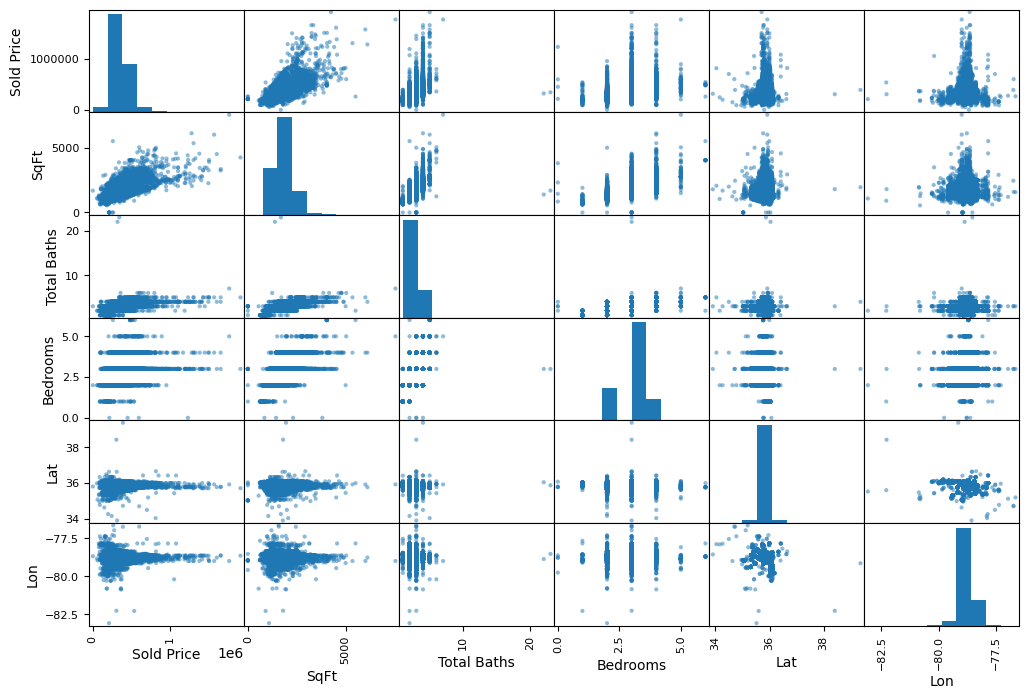

In [41]:
#Visualize the scatter matrix
scatter_columns = ["Sold Price", "SqFt", "Total Baths", "Bedrooms", 'Lat', 'Lon']
scatter_matrix(th_nostr_df[scatter_columns], figsize=(12, 8))
#plt.savefig('matrix.png')

<Axes: xlabel='SqFt', ylabel='Sold Price'>

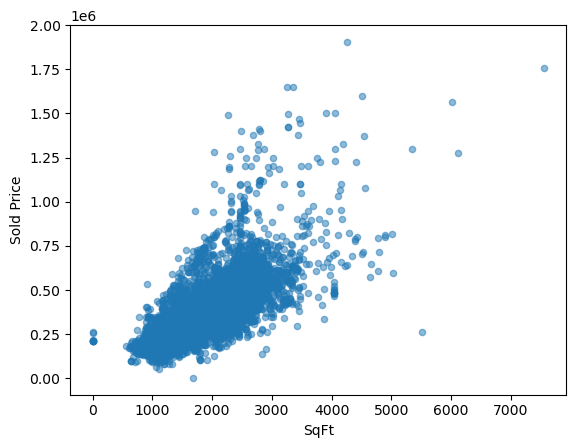

In [42]:
#Visualize the scatter plot for Total Living Area SqFt vs Sold Price
th_nostr_df.plot(kind="scatter", x="SqFt", y="Sold Price", alpha=0.5)
#plt.savefig('scatter.png')

In [43]:
#Create a new column for the price per square foot
th_nostr_df['Price per SqFt'] = th_nostr_df['Sold Price'] / th_nostr_df['SqFt']

#Create a correlation matrix to see what the correlation is for Price per SqFt
corr_matrix = th_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.989238
SqFt              0.726132
Total Baths       0.436058
Bedrooms          0.397968
Cluster           0.234104
Days on Market    0.098573
Over Asking       0.037485
Year Built        0.027307
Lat               0.022271
Price per SqFt   -0.019023
Acres            -0.031221
Zip              -0.039405
Lon              -0.092073
Name: Sold Price, dtype: float64

In [44]:
#Check the orginal data frame to see how many cities are in the data
len(th_df['City'].value_counts())

101

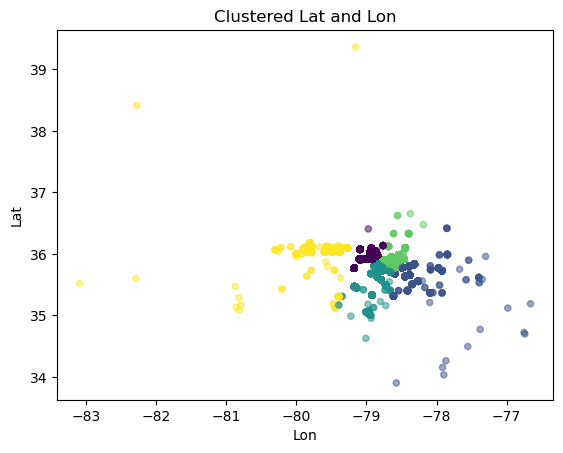

In [45]:
#Cluster the Lat and  Lon into groups
from sklearn.cluster import KMeans
th_df['Cluster'] = KMeans(n_clusters=5).fit_predict(th_df[['Lat', 'Lon']])
th_df.plot(kind="scatter", x="Lon", y="Lat", c="Cluster", cmap='viridis', colorbar=False, alpha=0.5)
plt.title('Clustered Lat and Lon')
plt.savefig('clustered.png')


In [46]:
#Create a variable for the top 10 cities with the highest average sold price
top10 = th_df.groupby('City')['Sold Price'].mean().nlargest(373).reset_index()

#Plot the top 10 cities with the highest average sold price
fig = px.bar(top10, x='City', y='Sold Price',color='City', template='plotly',
             title='Cities with Highest Avg. Sold Price') 
fig.update_traces(textposition='outside')
fig.show()

In [47]:
top10 = th_df.groupby('City')['Total Baths'].mean().nlargest(10).reset_index()

fig = px.bar(top10, x='City', y='Total Baths',color='Total Baths', template='plotly', 
             title='Top 10 Cities with the Most Avg Total Baths')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [48]:
df_mean = th_df.groupby('Over Asking')['SqFt'].mean().reset_index()

fig = px.scatter(df_mean, x='Over Asking', y='SqFt', trendline='ols', 
                 labels={'Over Asking':'Over Asking', 'SqFt':'Mean House Size'})
fig.update_layout(title='Distribution of Mean House Size by Over Asking')
fig.show()

In [49]:
fig = px.scatter(th_df, x='SqFt', y='Over Asking', color='Bedrooms', size='Total Baths',trendline='ols')
fig.update_layout(title='House Size vs Over Asking',
                  xaxis_title='House Size',
                  yaxis_title='Over Asking')
fig.show()

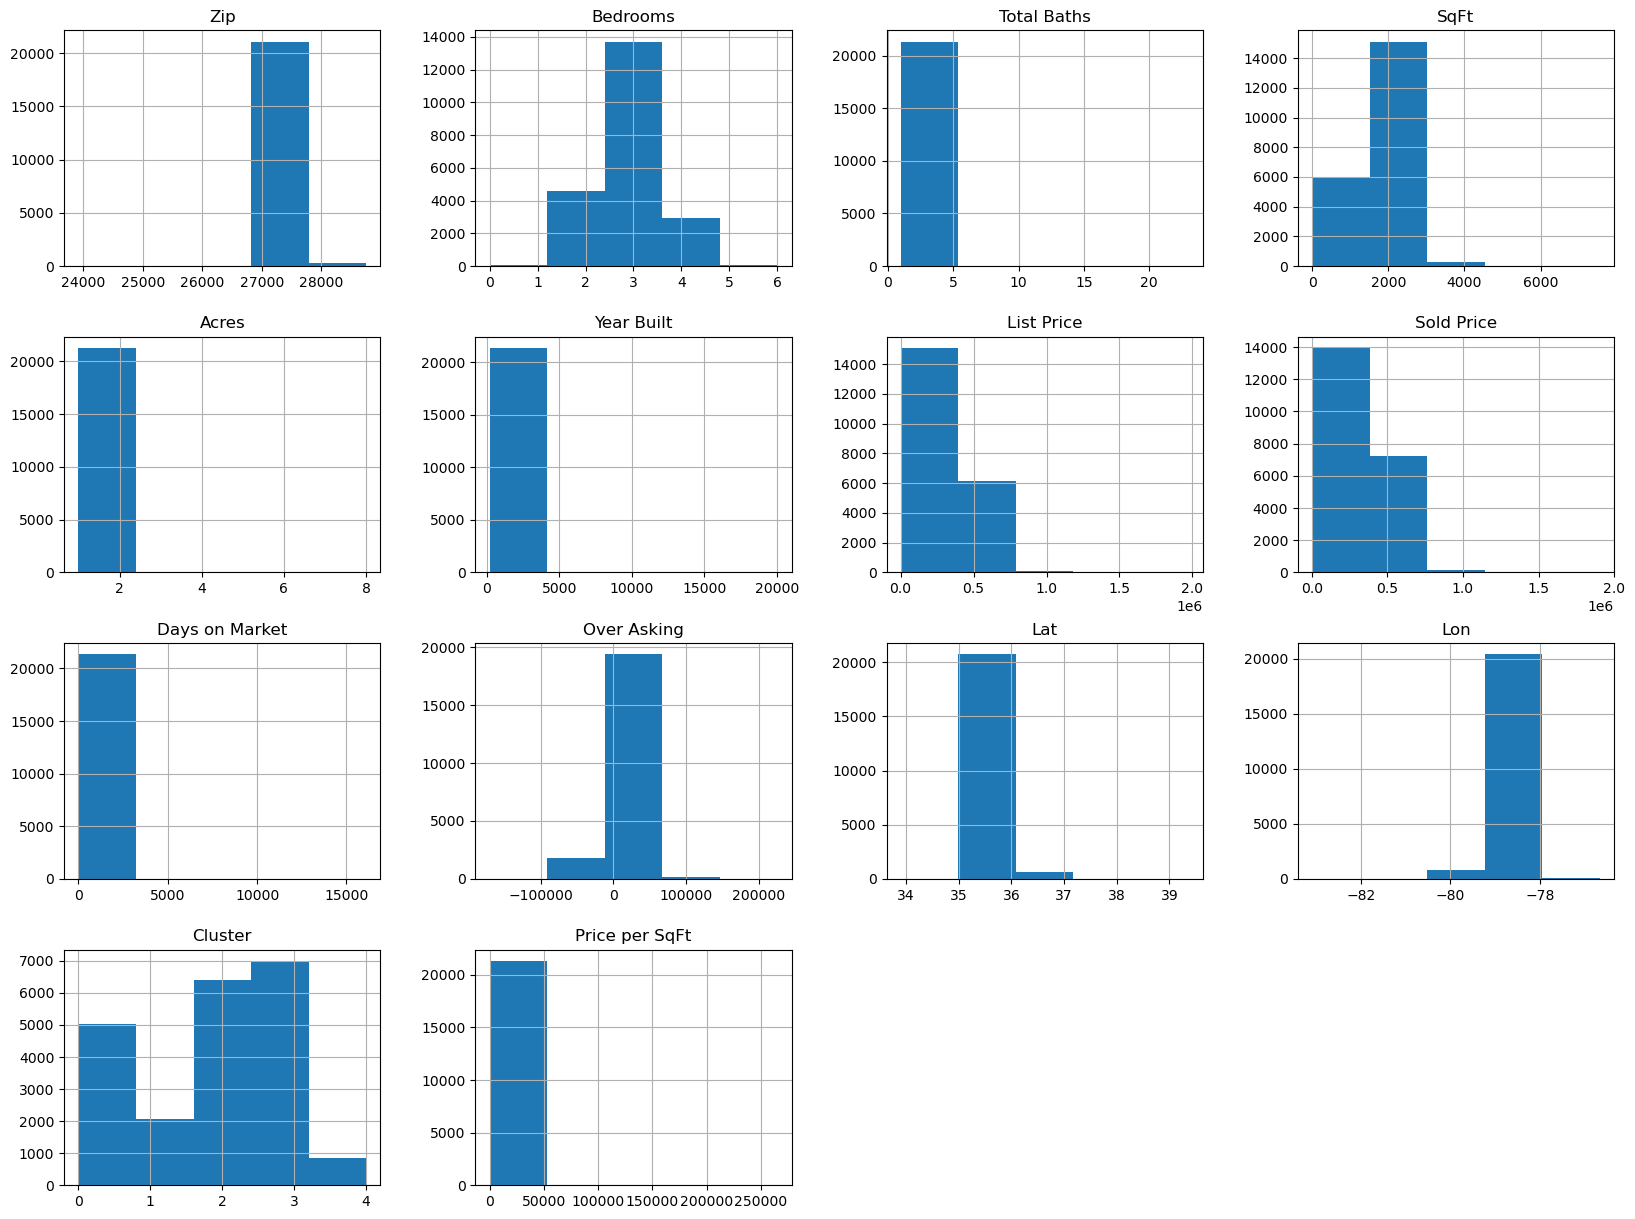

In [50]:
th_df.hist(bins=5, figsize=(20,15))
#plt.savefig("attribute_histogram_plots")
plt.show()

In [51]:
th_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
0,2509707,Cary,27511,4,4,6115,1,1985,2023-05-08,2023-06-12,1049900,1275000,35,225100,35.7641,-78.7786,2,208.503679
1,2444544,Chapel Hill,27517,4,5,4049,1,2004,2022-04-25,2022-06-07,1090000,1300000,43,210000,35.9182,-79.0035,0,321.066930
2,2320632,Durham,27707,3,5,2763,1,2020,2020-05-22,2021-08-05,575000,729840,440,154840,35.9631,-78.9315,0,264.147666
3,2428221,Cary,27511,3,4,3477,1,2004,2022-01-24,2022-02-09,949900,1100000,16,150100,35.7641,-78.7786,2,316.364682
4,10018970,Chapel Hill,27517,4,5,4049,1,2004,2024-04-06,2024-04-17,1350000,1500000,11,150000,35.9182,-79.0035,0,370.461842


In [52]:
# Variable with the Longitude and Latitude
X=th_df.loc[:,['MLS #','Lat','Lon']]
X.head(10)

,MLS #,Lat,Lon
0,2509707,35.7641,-78.7786
1,2444544,35.9182,-79.0035
2,2320632,35.9631,-78.9315
3,2428221,35.7641,-78.7786
4,10018970,35.9182,-79.0035
5,2475238,35.9182,-79.0035
6,2492270,35.7908,-78.6530
7,2456097,35.8520,-78.6841
8,2353812,35.7641,-78.7786
9,2405051,36.0918,-78.9299


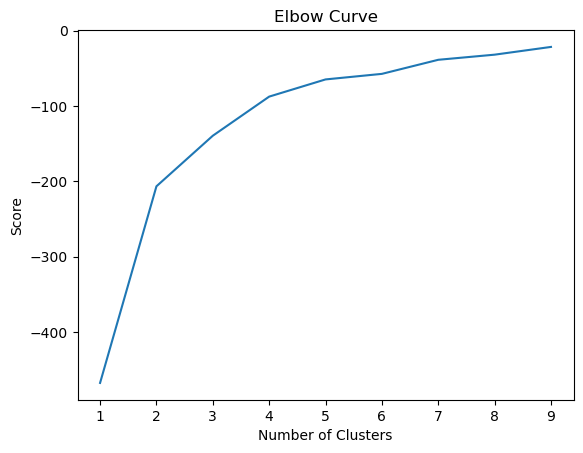

In [53]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = th_df[['Lat']]
X_axis = th_df[['Lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [54]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,MLS #,Lat,Lon,cluster_label
0,2509707,35.7641,-78.7786,0
1,2444544,35.9182,-79.0035,1
2,2320632,35.9631,-78.9315,1
3,2428221,35.7641,-78.7786,0
4,10018970,35.9182,-79.0035,1
5,2475238,35.9182,-79.0035,1
6,2492270,35.7908,-78.6530,0
7,2456097,35.8520,-78.6841,0
8,2353812,35.7641,-78.7786,0
9,2405051,36.0918,-78.9299,1


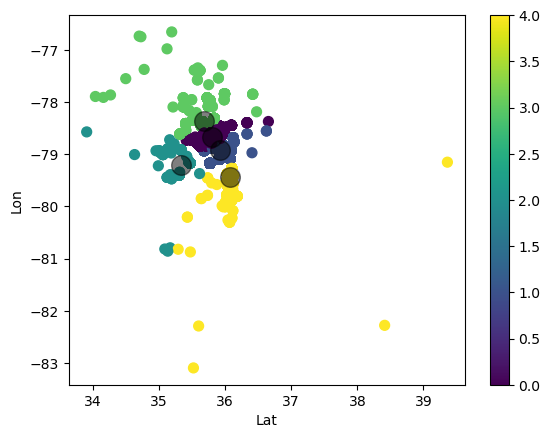

In [55]:
X.plot.scatter(x = 'Lat', y = 'Lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

<Axes: xlabel='SqFt'>

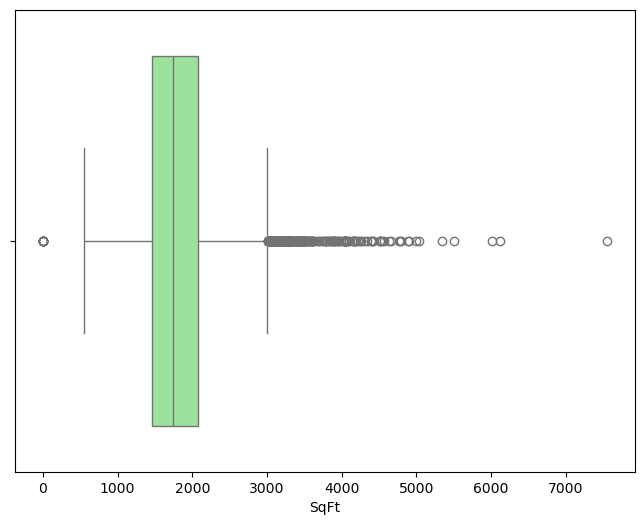

In [56]:
#Visualize the distribution of each numerical feature using box plots. Points beyond the “whiskers” of the box plot can be considered potential outliers.  
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['SqFt'], color='lightgreen')

<Axes: xlabel='Bedrooms'>

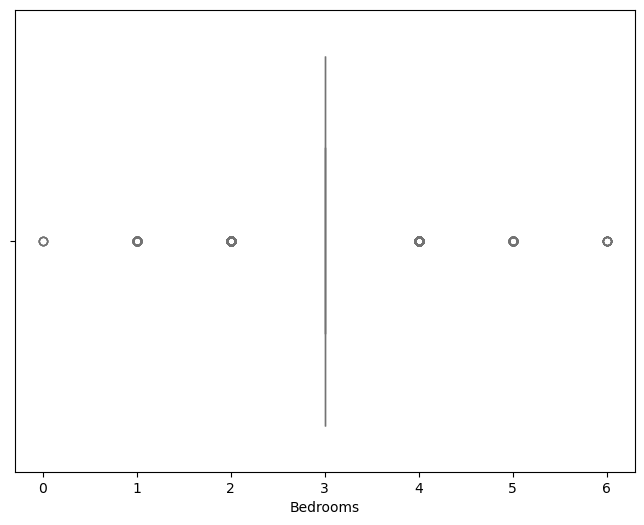

In [57]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Bedrooms'], color='lightgreen')

<Axes: xlabel='Total Baths'>

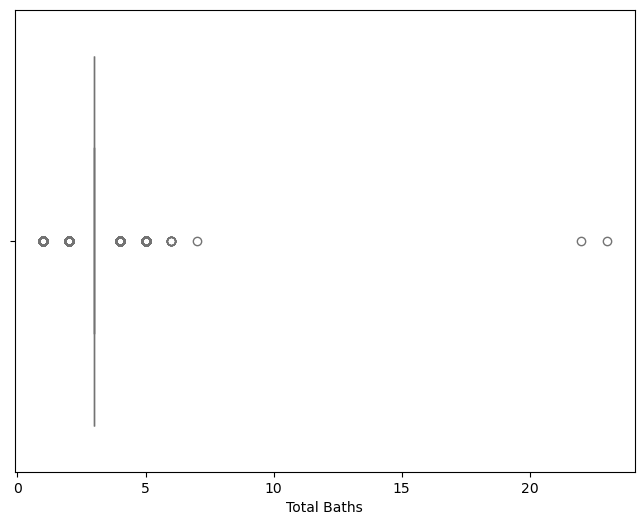

In [58]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Total Baths'], color='lightgreen')

<Axes: xlabel='Acres'>

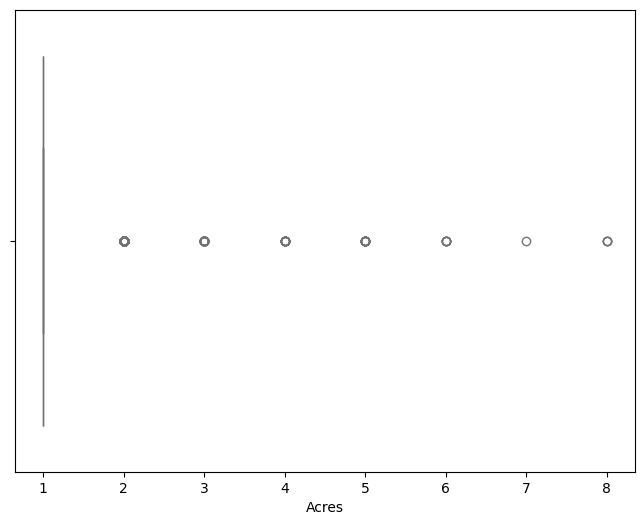

In [59]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Acres'], color='lightgreen')

<Axes: xlabel='Days on Market'>

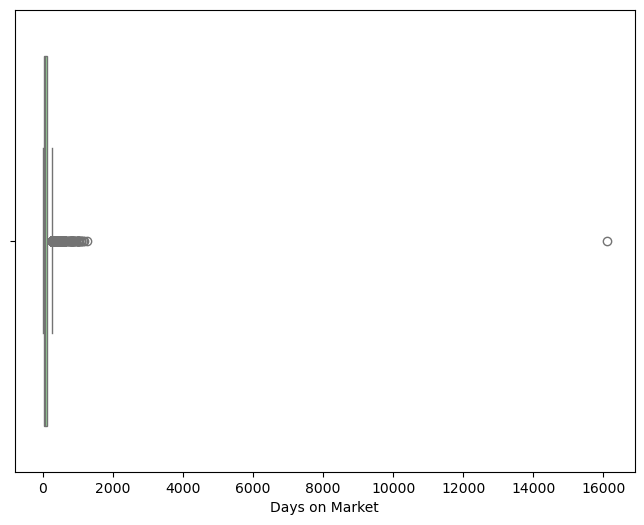

In [60]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Days on Market'], color='lightgreen')

<Axes: xlabel='Year Built'>

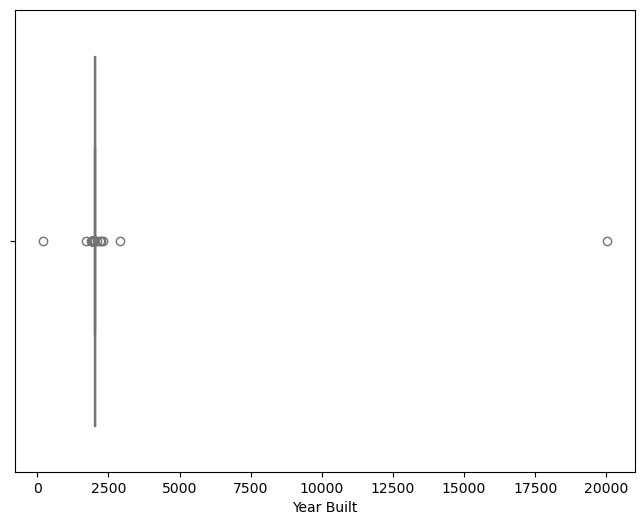

In [61]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Year Built'], color='lightgreen')

In [62]:
#Calculate the Z-score for each data point, and points with a Z-score beyond a certain threshold can be considered outliers.
from scipy.stats import zscore

z_scores = zscore(th_nostr_df)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

outliers

0        False
1        False
2        False
3        False
4        False
         ...  
21340    False
21341    False
21342    False
21343    False
21344    False
Length: 21345, dtype: bool

In [63]:
Q1 = th_nostr_df.quantile(0.25)
Q3 = th_nostr_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((th_nostr_df < (Q1 - 1.5 * IQR)) | (th_nostr_df > (Q3 + 1.5 * IQR))).any(axis=1)

outliers

0        True
1        True
2        True
3        True
4        True
         ... 
21340    True
21341    True
21342    True
21343    True
21344    True
Length: 21345, dtype: bool

<Axes: xlabel='Sold Price', ylabel='Count'>

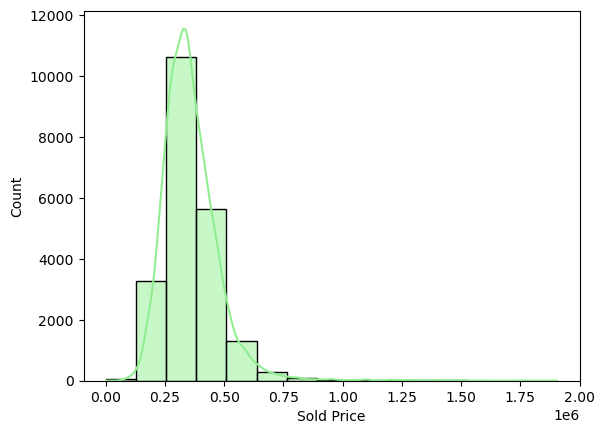

In [64]:
sns.histplot(th_df['Sold Price'], bins=15, kde=True, color='lightgreen')


([<matplotlib.patches.Wedge at 0x142f51690>,
 [Text(-0.9917520908502232, -0.4758442920685409, '3'),
  Text(1.099981411697968, -0.006394835333726077, '2'),
  Text(0.5046114843890602, 0.9774288975790871, '4'),
  Text(0.03900953750630457, 1.09930808055956, '1'),
  Text(0.01570360985108386, 1.0998879018507501, '5'),
  Text(0.003075952414373491, 1.0999956993173858, '6'),
  Text(0.0006474589730247949, 1.09999980945311, '0')],
 [Text(-0.5409556859183035, -0.2595514320373859, '64.2%'),
  Text(0.5999898609261644, -0.0034880920002142235, '21.3%'),
  Text(0.2752426278485783, 0.5331430350431383, '13.7%'),
  Text(0.0212779295488934, 0.5996225893961237, '0.4%'),
  Text(0.008565605373318467, 0.5999388555549545, '0.3%'),
  Text(0.001677792226021904, 0.5999976541731195, '0.1%'),
  Text(0.0003531594398317063, 0.5999998960653327, '0.0%')])

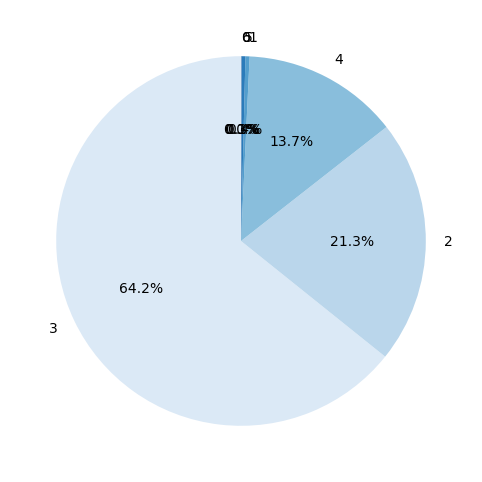

In [65]:
bedroom_counts = th_df['Bedrooms'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(bedroom_counts, labels=bedroom_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))


([<matplotlib.patches.Wedge at 0x142fcf590>,
 [Text(-0.9615645390925872, -0.5342224603661481, '3'),
  Text(1.0923550883094169, 0.12946181307445861, '4'),
  Text(0.46112305569960876, 0.9986818950507992, '2'),
  Text(0.0700553339558249, 1.0977669380083999, '1'),
  Text(0.02412129253819043, 1.0997354969474646, '5'),
  Text(0.002266747233217934, 1.0999976644779663, '6'),
  Text(0.0008096503092250514, 1.099999702030131, '23'),
  Text(0.0004858507098361536, 1.0999998927041257, '22'),
  Text(0.00016205106834840536, 1.0999999880633868, '7')],
 [Text(-0.5244897485959565, -0.29139406929062617, '66.1%'),
  Text(0.5958300481687728, 0.07061553440425014, '21.5%'),
  Text(0.2515216667452411, 0.5447355791186177, '11.0%'),
  Text(0.03821200033954086, 0.5987819661863999, '0.7%'),
  Text(0.013157068657194777, 0.599855725607708, '0.6%'),
  Text(0.0012364075817552368, 0.5999987260788907, '0.0%'),
  Text(0.0004416274413954825, 0.5999998374709805, '0.0%'),
  Text(0.0002650094780924474, 0.5999999414749776, '0

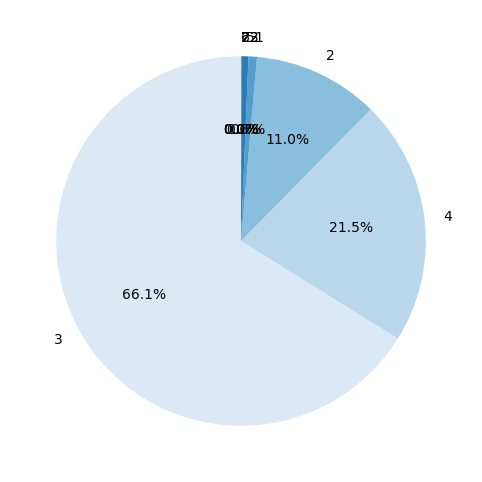

In [66]:
bathroom_counts = th_df['Total Baths'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(bathroom_counts, labels=bathroom_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))


In [67]:
# Compute correlation matrix
corr_matrix = th_nostr_df.corr()

<Axes: >

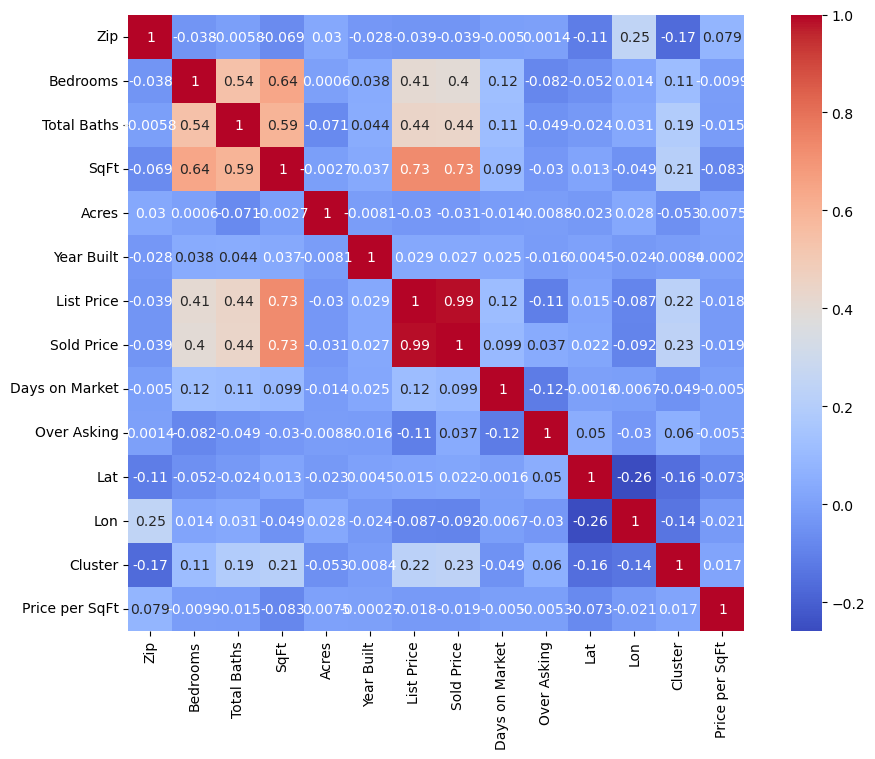

In [68]:
# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)